In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

AxesImage(54,36;334.8x217.44)
9


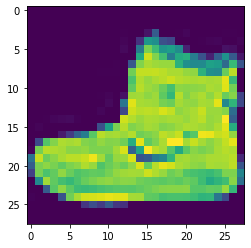

In [2]:
# Improving Computer Vision Accuracy using Convolutions
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
print(plt.imshow(training_images[0]))
print(training_labels[0])

In [3]:
training_images=training_images / 255.0
test_images=test_images / 255.0
print("training_images", training_images.shape)
print("training_labels", training_labels.shape)
print("test_images", test_images.shape)
print("test_labels", test_labels.shape)

training_images (60000, 28, 28)
training_labels (60000,)
test_images (10000, 28, 28)
test_labels (10000,)


In [4]:
# model 1 without using convolutions.
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(1,28,28)),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model1.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4970 - accuracy: 0.8250 - val_loss: 0.4278 - val_accuracy: 0.8442
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3759 - accuracy: 0.8648 - val_loss: 0.3936 - val_accuracy: 0.8587
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3368 - accuracy: 0.8767 - val_loss: 0.3635 - val_accuracy: 0.8683
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3115 - accuracy: 0.8854 - val_loss: 0.3460 - val_accuracy: 0.8749
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.8910 - val_loss: 0.3579 - val_accuracy: 0.8665
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2779 - accuracy: 0.8964 - val_loss: 0.3330 - val_accuracy: 0.8837
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2647 - accuracy: 0.9015 - val_loss: 0.3374 - val_accuracy:

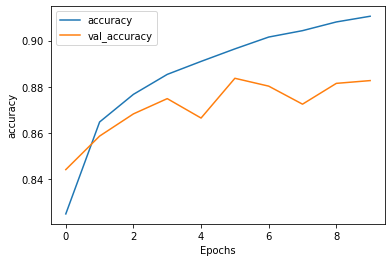

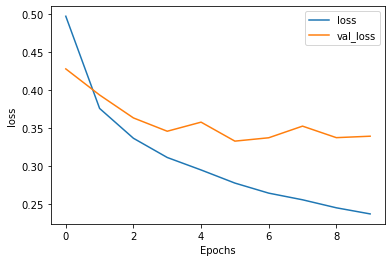

In [6]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [7]:
m1_loss, m1_acc = model1.evaluate(test_images, test_labels)
print("test loss", m1_loss)
print("test aaccuracy", m1_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3395 - accuracy: 0.8827
test loss 0.33945944905281067
test aaccuracy 0.8827000260353088


original value:  1
predicted value:  1
AxesImage(54,36;334.8x217.44)


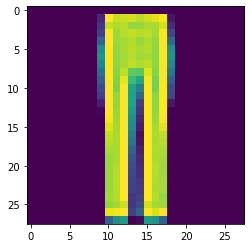

In [8]:
val = random.randint(0,10000)
result = model1.predict(test_images[val].reshape(-1, 1, 28, 28))
result_val = np.where(result == np.amax(result))
print("original value: ", test_labels[val])
print("predicted value: ", result_val[1][0])
print(plt.imshow(test_images[val]))

original value:  5
predicted value:  5
AxesImage(54,36;334.8x217.44)


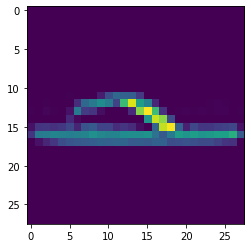

In [9]:
val = random.randint(0,10000)
result = model1.predict(test_images[val].reshape(-1,1, 28, 28))
result_val = np.where(result == np.amax(result))
print("original value: ", test_labels[val])
print("predicted value: ", result_val[1][0])
print(plt.imshow(test_images[val]))

## **MODEL 2 using convolutions(conv model)**

In [10]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
(ti, tl), (tei, tel) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [11]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [13]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.4353 - accuracy: 0.8422 - val_loss: 0.3585 - val_accuracy: 0.8740
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2937 - accuracy: 0.8923 - val_loss: 0.3067 - val_accuracy: 0.8845
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2479 - accuracy: 0.9079 - val_loss: 0.2759 - val_accuracy: 0.9003
Epoch 4/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2163 - accuracy: 0.9185 - val_loss: 0.2580 - val_accuracy: 0.9033
Epoch 5/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1881 - accuracy: 0.9296 - val_loss: 0.2599 - val_accuracy: 0.9048
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1643 - accuracy: 0.9372 - val_loss: 0.2576 - val_accuracy: 0.9095
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1460 - accuracy: 0.9445 - val_loss: 0.2562 -

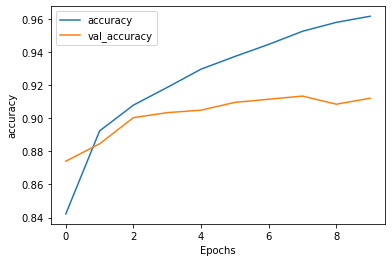

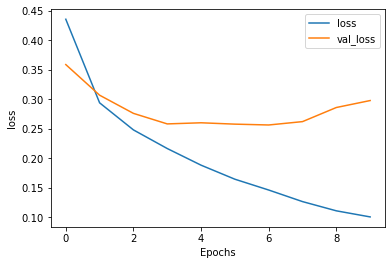

In [14]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [15]:
m2_loss, m2_acc = model2.evaluate(test_images, test_labels)
print("test loss", m2_loss)
print("test aaccuracy", m2_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.2976 - accuracy: 0.9120
test loss 0.2975931763648987
test aaccuracy 0.9120000004768372


original value:  4
predicted value:  4
AxesImage(54,36;334.8x217.44)


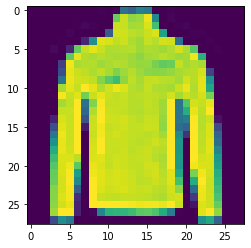

In [16]:
val = random.randint(0,10000)
result = model2.predict(test_images[val].reshape(1, 28, 28, 1))
result_val = np.where(result == np.amax(result))
print("original value: ", test_labels[val])
print("predicted value: ", result_val[1][0])
print(plt.imshow(tei[val]))

original value:  5
predicted value:  5
AxesImage(54,36;334.8x217.44)


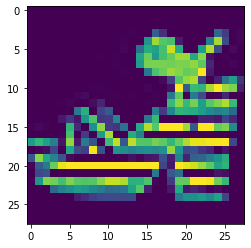

In [17]:
val = random.randint(0,10000)
result = model2.predict(test_images[val].reshape(1, 28, 28, 1))
result_val = np.where(result == np.amax(result))
print("original value: ", test_labels[val])
print("predicted value: ", result_val[1][0])
print(plt.imshow(tei[val]))

# **Model 3 - tweaking model 2 parameters for better accuracy**

In [18]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [19]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [20]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [21]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model3.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1556 - accuracy: 0.9541 - val_loss: 0.0651 - val_accuracy: 0.9779
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0526 - accuracy: 0.9840 - val_loss: 0.0489 - val_accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0342 - accuracy: 0.9896 - val_loss: 0.0457 - val_accuracy: 0.9849
Epoch 4/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0223 - accuracy: 0.9931 - val_loss: 0.0480 - val_accuracy: 0.9847
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0151 - accuracy: 0.9954 - val_loss: 0.0561 - val_accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0118 - accuracy: 0.9962 - val_loss: 0.0532 - val_accuracy: 0.9859
Epoch 7/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0084 - accuracy: 0.9970 - val_loss: 0.0486 -

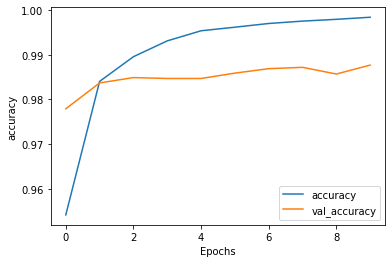

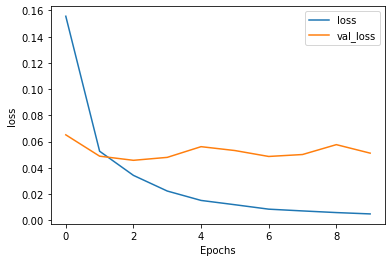

In [22]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [23]:
m3_loss, m3_acc = model3.evaluate(test_images, test_labels)
print("test loss",m3_loss)
print("test acc", m3_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0512 - accuracy: 0.9877
test loss 0.05117349699139595
test acc 0.9876999855041504


original value:  8
predicted value:  8
AxesImage(54,36;334.8x217.44)


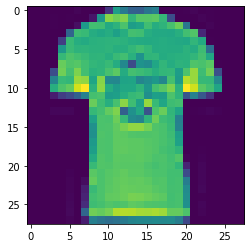

In [24]:
val = random.randint(0,10000)
result = model3.predict(test_images[val].reshape(1, 28, 28, 1))
result_val = np.where(result == np.amax(result))
print("original value: ", test_labels[val])
print("predicted value: ", result_val[1][0])
print(plt.imshow(tei[val]))

original value:  7
predicted value:  7
AxesImage(54,36;334.8x217.44)


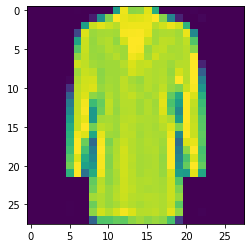

In [25]:
val = random.randint(0,10000)
result = model3.predict(test_images[val].reshape(1, 28, 28, 1))
result_val = np.where(result == np.amax(result))
print("original value: ", test_labels[val])
print("predicted value: ", result_val[1][0])
print(plt.imshow(tei[val]))

**Comparing all three models
**

In [26]:
print("model 1 loss: ",m1_loss)
print("model 2 loss: ", m2_loss)
print("model 3 loss: ", m3_loss)
print("model 1 acc: ", m1_acc)
print("model 2 acc: ", m2_acc)
print("model 3 acc: ", m3_acc)

model 1 loss:  0.33945944905281067
model 2 loss:  0.2975931763648987
model 3 loss:  0.05117349699139595
model 1 acc:  0.8827000260353088
model 2 acc:  0.9120000004768372
model 3 acc:  0.9876999855041504
